# Generalized {n,3}-gram approximate logarithmic spirals

## Set up plotting, math, and polar-to-cartesian utility functions

In [1]:
% matplotlib notebook
import matplotlib
# matplotlib.use('SVG')
import matplotlib.pyplot as plt
import numpy as np
from math import *

In [2]:
vcos = np.vectorize(cos)
vsin = np.vectorize(sin)

In [3]:
def xyfromr(theta,r):
    return vcos(theta) * r, vsin(theta) * r

In [4]:
def thrfromxy(x, y):
    """x = array of x coordinates, y = array of y coordinates)
returns theta, r arrays"""
    r = np.array([sqrt(xx * xx + yy * yy) for xx, yy in zip(x, y)])
    th = np.array([atan2(yy, xx) for xx, yy in zip(x, y)])
    return th, r

In [5]:
@np.vectorize
def rfunc(rbase, theta_denom, angle):
    return rbase ** (min(abs(angle), twopi - angle) / theta_denom)

In [6]:
def rotate(x, y, c, s):
    return x * c - y * s, y * c + x * s

In [7]:
# Rotate theta, r coordinates by angle rot around (r,theta) point p,
# then scale the new radius
def mytwist(theta, r, rot, scale, p):
    x, y = xyfromr(theta,r)
    px, py = xyfromr(*p)
    xx, yy = rotate(x-px,y-py,cos(rot),sin(rot))
    xx += px
    yy += py
    th, rr = thrfromxy(xx,yy)
    rr *= scale
    return (th, rr)

In [8]:
def xydist(xy1, xy2):
    x1, y1 = xy1
    x2, y2 = xy2
    return sqrt((x1-x2)**2 + (y1-y2)**2)

In [9]:
def rdist(r1, th1, r2, th2):
    return xydist(xyfromr(r1,th1), xyfromr(r2,th2))

In [10]:
def stretch(theta,r,alpha):
    xx, yy = xyfromr(theta,r)
    return(thrfromxy(xx*alpha,yy))

<IPython.core.display.Javascript object>


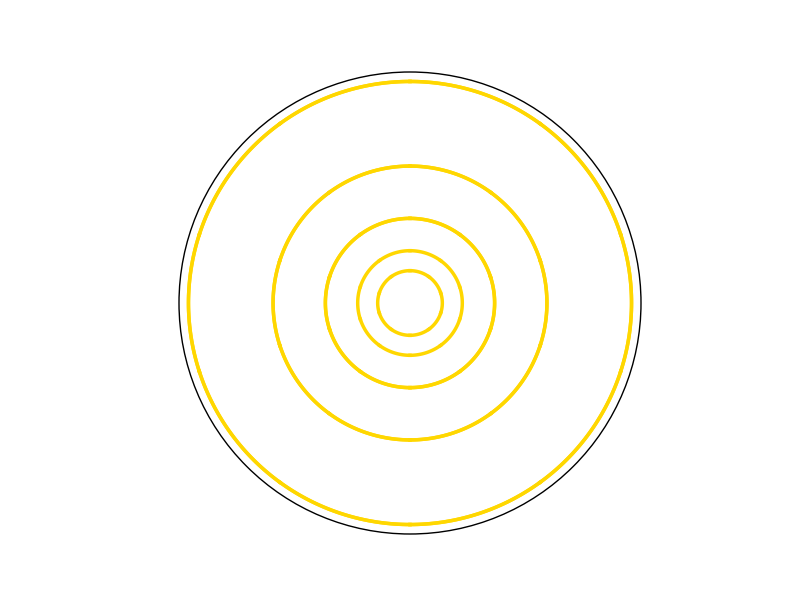

In [11]:
plt.ion()
n = 10
clr='gold'
lw=2

# n = number of sides in polygon
polyangle = 2 * pi / n
degangle = 360 // n
polyside = 2 * sin( pi / n )
anglerange = int(degangle + 1)

# radius to vertex of polygon enclosed in {n/3}
rscaleinv = 1 - polyside**2
rscale = 1 / rscaleinv
nn = n // 2
pi_over_nn = pi / nn
twopi = 2. * pi

theta = np.array([pi * a / 180. for a in range(anglerange)])

r = np.array([1.0 for th in theta])

plt.clf()
# Polar plot:
sp = plt.subplot(1, 1, 1, projection='polar')

# Turn labels off:
sp.grid(False)
sp.set_xticklabels([])
sp.set_yticklabels([])

tc = np.array([pi * a / 180. for a in range(361)])
rc = np.array([1.0 for t in tc])

plt.plot(tc,rc,color='teal',linewidth=1)

for j in range(nn):

    tt, rr = mytwist(theta,r,polyangle,1,(r[0],theta[0]))
    
    tt += 2 * polyangle * j + polyangle / 2

    for i in range(nn):
        plt.plot(tt,rr,color=clr,linewidth=lw)
        if (i < (nn-1)):
            tt += polyangle
            rr *= rscaleinv
            
    tt = 2 * polyangle * j - (tt - (2*polyangle*j) - polyangle / 2) + polyangle / 2

    for i in range(nn):
        plt.plot(tt,rr,color=clr,linewidth=lw)
        tt += polyangle
        rr *= rscale
        
for j in range(nn):

    tt, rr = mytwist(theta,r,polyangle,1,(r[0],theta[0]))
    
    tt += 2 * polyangle * j + polyangle + polyangle / 2

    for i in range(nn):
            
        if ( i < (nn-2)):
            plt.plot(tt,rr,color=clr,linewidth=lw)
        
        if (i < (nn-1)):
            tt += polyangle
            rr *= rscaleinv
            
    tt = 2 * polyangle * j - (tt - (2*polyangle*j) - polyangle / 2) + polyangle / 2

    for i in range(nn):
        if ( i > 1 ):
            plt.plot(tt,rr,color=clr,linewidth=lw)
            
        tt += polyangle
        rr *= rscale
        
